In [1]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )

In [3]:
sample_data_original = pd.read_csv('/home/chenhao/quant/quant_sys/data/sample_data.csv')
sample_data_original = sample_data_original[sample_data_original.period=='60min\n']
sample_data_original.head(5)

,id,stock_code,trade_time,_trade_time,open_price,high_price,low_price,close_price,vol,amount,period,gmt_modified,gmt_created
0,2,600127.SH,2019-06-28 14:00:00,2019-06-28 14:00:00+08,4.98,4.99,4.91,4.93,3073500,15170306.0,60min\n,2019-07-01 15:02:48.366814+08,2019-07-01 14:33:00.281192+08
1,3,600127.SH,2019-06-28 11:30:00,2019-06-28 11:30:00+08,5.04,5.05,4.87,4.98,12618212,62498266.0,60min\n,2019-07-01 15:02:48.369289+08,2019-07-01 14:33:01.384544+08
2,4,600127.SH,2019-06-28 10:30:00,2019-06-28 10:30:00+08,5.12,5.15,5.03,5.04,11094400,56380406.0,60min\n,2019-07-01 15:02:48.37183+08,2019-07-01 14:33:02.158104+08
3,5,600127.SH,2019-06-28 09:30:00,2019-06-28 09:30:00+08,5.13,5.13,5.13,5.13,19300,99009.0,60min\n,2019-07-01 15:02:48.374339+08,2019-07-01 14:33:03.356418+08
4,6,600127.SH,2019-06-27 15:00:00,2019-06-27 15:00:00+08,5.13,5.15,5.11,5.13,8988356,46080060.0,60min\n,2019-07-01 15:02:48.376721+08,2019-07-01 14:33:03.80116+08


In [4]:
sample_data = sample_data_original.drop(['id','_trade_time','period','gmt_modified','gmt_created'],axis=1)
sample_data.head(1)

,stock_code,trade_time,open_price,high_price,low_price,close_price,vol,amount
0,600127.SH,2019-06-28 14:00:00,4.98,4.99,4.91,4.93,3073500,15170306.0


In [6]:
sample_data = sample_data.sort_values(by=['stock_code','trade_time'])
sample_data = sample_data.reset_index(drop=True)
sample_data.head(10)

,stock_code,trade_time,open_price,high_price,low_price,close_price,vol,amount
0,000503.SZ,2019-02-01 09:30:00,14.00,14.00,14.00,14.00,33600,470400.00
1,000503.SZ,2019-02-01 10:30:00,14.07,14.21,14.01,14.13,2636300,37202531.02
2,000503.SZ,2019-02-01 11:30:00,14.14,14.26,14.07,14.15,1768583,25092432.30
3,000503.SZ,2019-02-01 14:00:00,14.15,14.20,14.04,14.18,1333478,18820814.58
4,000503.SZ,2019-02-01 15:00:00,14.18,14.32,14.14,14.30,2732752,38919943.02
5,000503.SZ,2019-02-11 09:30:00,14.26,14.26,14.26,14.26,29668,423065.68
6,000503.SZ,2019-02-11 10:30:00,14.28,14.77,14.28,14.59,3586340,52228252.51
7,000503.SZ,2019-02-11 11:30:00,14.59,14.68,14.56,14.60,1304469,19066269.71
8,000503.SZ,2019-02-11 14:00:00,14.61,14.71,14.60,14.67,1128500,16545351.00
9,000503.SZ,2019-02-11 15:00:00,14.67,14.68,14.58,14.63,1874596,27442484.32


In [7]:
stock_code = sample_data['stock_code']
cat_code = stock_code.astype('category')
cat_code.value_counts()

600256.SH    480
600127.SH    480
600125.SH    480
000503.SZ    480
Name: stock_code, dtype: int64

In [9]:
sample_data.iloc[478:483]

,stock_code,trade_time,open_price,high_price,low_price,close_price,vol,amount
478,000503.SZ,2019-06-28 14:00:00,17.18,17.19,16.83,16.91,3211483,54560546.60
479,000503.SZ,2019-06-28 15:00:00,16.91,17.19,16.89,17.16,1819038,31028417.16
480,600125.SH,2019-02-01 09:30:00,6.97,6.97,6.97,6.97,34200,242820.00
481,600125.SH,2019-02-01 10:30:00,6.97,6.98,6.92,6.96,2637271,18687760.00
482,600125.SH,2019-02-01 11:30:00,6.96,7.06,6.95,7.00,3070200,21864782.00


In [11]:
one_sample = sample_data.iloc[0:480,:]
one_sample.tail(5)

,stock_code,trade_time,open_price,high_price,low_price,close_price,vol,amount
475,000503.SZ,2019-06-28 09:30:00,17.69,17.69,17.69,17.69,113600,2009492.00
476,000503.SZ,2019-06-28 10:30:00,17.63,17.79,17.38,17.44,3528129,62021392.13
477,000503.SZ,2019-06-28 11:30:00,17.45,17.50,17.11,17.18,2199881,37994350.17
478,000503.SZ,2019-06-28 14:00:00,17.18,17.19,16.83,16.91,3211483,54560546.60
479,000503.SZ,2019-06-28 15:00:00,16.91,17.19,16.89,17.16,1819038,31028417.16


Text(0,0.5,'Close')

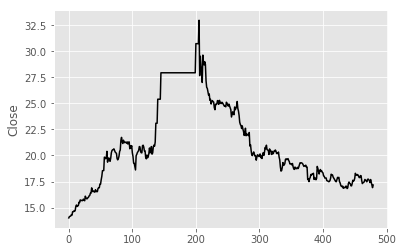

In [12]:
close = one_sample.close_price
plt.subplot(111)
plt.plot(close,'k')
plt.ylabel('Close')

In [17]:
sma5 = pd.Series(0.0, index=close.index)
for i in range(4,len(close)):
    sma5[i] = sum(close[(i-4):(i+1)])/5
    
sma10 = pd.Series(0.0, index=close.index)
for i in range(9,len(close)):
    sma10[i] = sum(close[(i-9):(i+1)])/10

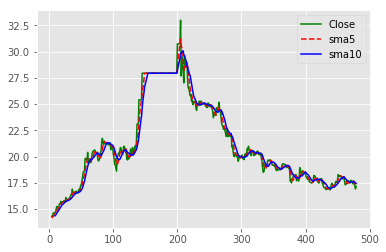

In [18]:
plt.plot(close[4:],label='Close',color='g')
plt.plot(sma5[4:],label='sma5',color='r',linestyle='dashed')
plt.plot(sma10[9:],label='sma10',color='b')
plt.legend()

In [23]:
#指数移动平均
# 计算EMA
# alpha = 2/(N+1)
# EMA(i) = (1 - alpha) * EMA(i-1) + alpha * CLOSE(i)

def ema_cal(close_price, period=5, alpha=0.2):
    import pandas as pd
    import numpy as np
    ema = pd.Series(0.0,index=close_price.index)
    ema[period-1] = np.mean(close_price[:period])
    for i in range(period,len(close_price)):
        ema[i] = (1-alpha)*ema[i-1] + alpha * close_price[i]
    return(ema)

In [24]:
close.index

RangeIndex(start=0, stop=480, step=1)

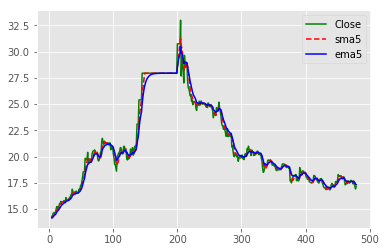

In [26]:
ema5 = ema_cal(close,5,0.2)
# ema5.head()
plt.plot(close[4:],label='Close',color='g')
plt.plot(sma5[4:],label='sma5',color='r',linestyle='dashed')
plt.plot(ema5[4:],label='ema5',color='b')
plt.legend()

In [82]:
xkgf = pd.read_csv('/home/chenhao/quant/quant_sys/data/601127.csv')
xkgf['date'] = pd.to_datetime(xkgf['Unnamed: 0'])
xkgf.set_index('date', inplace=True)
xkgf.head(5)

,Unnamed: 0,close
date,,
2019-01-02 10:00:00,2019-01-02 10:00:00,16.66
2019-01-02 11:00:00,2019-01-02 11:00:00,16.65
2019-01-02 12:00:00,2019-01-02 12:00:00,16.62
2019-01-02 14:00:00,2019-01-02 14:00:00,16.70
2019-01-02 15:00:00,2019-01-02 15:00:00,16.70


In [56]:
###计算MACD

#短时
short = 12
#长时
long = 26
#diff的m值
m = 9

DIF = ema_cal(xkgf.close,12,2/(1+12)) - ema_cal(xkgf.close,26,2/(1+26))
DEA = ema_cal(DIF,9,2/(1+9))

MACD = DIF - DEA

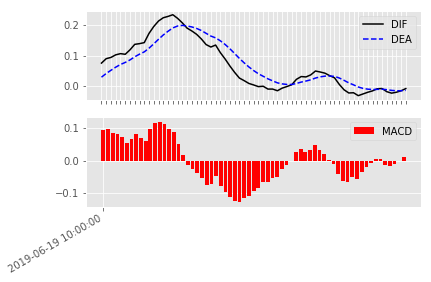

In [125]:
MACD_sub = MACD[550:]*2

plt.subplot(211)
#plt.xticks(np.arange(len(DIF)-26,step=250))
plt.plot(DIF[550:],'k',label='DIF')
plt.plot(DEA[550:],label='DEA',color = 'b',linestyle='dashed')
plt.legend()

plt.subplot(212)
#plt.tick_params(axis='x',which='major',labelsize=5,width=50)
plt.gcf().autofmt_xdate()
plt.xticks(np.arange(0,len(MACD_sub),step=65))
plt.bar(left=MACD_sub.index,height=MACD_sub,label='MACD',color='r')
plt.legend()



In [133]:
#每天5个,20天
macd_sub = MACD.tail(100)
macd_sub

2019-06-10 10:00:00    0.014318
2019-06-10 11:00:00    0.023770
2019-06-10 12:00:00    0.032147
2019-06-10 14:00:00    0.023384
2019-06-10 15:00:00    0.015132
2019-06-11 10:00:00    0.004409
2019-06-11 11:00:00    0.010557
2019-06-11 12:00:00    0.013531
2019-06-11 14:00:00    0.020712
2019-06-11 15:00:00    0.023085
2019-06-12 10:00:00    0.028012
2019-06-12 11:00:00    0.026559
2019-06-12 12:00:00    0.024952
2019-06-12 14:00:00    0.023276
2019-06-12 15:00:00    0.017124
2019-06-13 10:00:00    0.009088
2019-06-13 11:00:00    0.007292
2019-06-13 12:00:00    0.011400
2019-06-13 14:00:00    0.011945
2019-06-13 15:00:00    0.011480
2019-06-14 10:00:00   -0.036209
2019-06-14 11:00:00   -0.043267
2019-06-14 12:00:00   -0.041620
2019-06-14 14:00:00   -0.021745
2019-06-14 15:00:00   -0.001010
2019-06-17 10:00:00    0.021093
2019-06-17 11:00:00    0.034551
2019-06-17 12:00:00    0.043721
2019-06-17 14:00:00    0.050262
2019-06-17 15:00:00    0.053419
                         ...   
2019-06-